First 5 rows of dataset:
  student_id     name  class  comprehension  attention  focus  retention  \
0      S1000  Krishna     12           70.8       74.0   50.9       64.6   
1      S1001   Ritika      9          100.0       80.4   43.6       92.7   
2      S1002    Rohan     10           75.7       83.2   43.7       68.3   
3      S1003     Diya     12           82.7       92.6   18.1       71.7   
4      S1004   Kartik      8           67.2       53.3   71.8       70.0   

   engagement_time  assessment_score  
0            367.1              55.4  
1            377.9              78.3  
2            379.2              58.8  
3            175.7              70.5  
4             98.1              67.9  


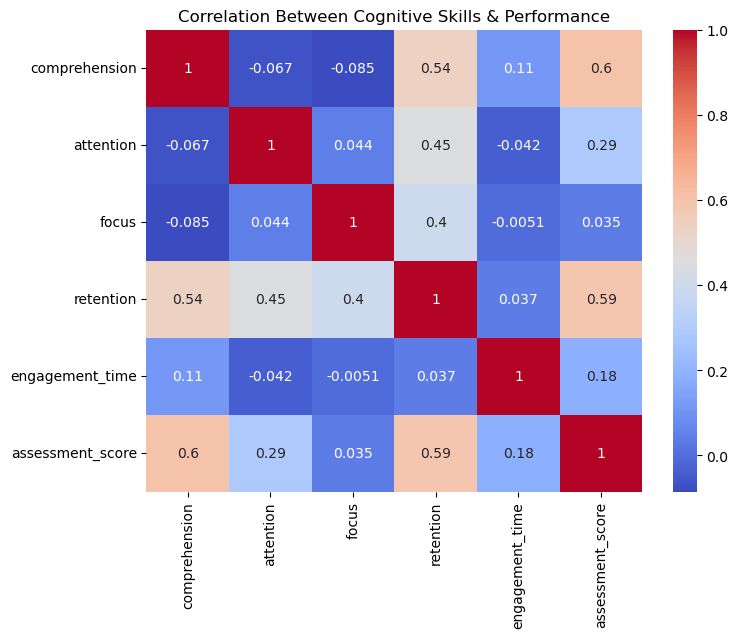


 Assessment Scores / Model Performance:
R² Score: 0.5125246328012867
RMSE: 8.146111034426177

Feature Importance:
           Feature  Coefficient
0    comprehension     0.384321
1        attention     0.128601
2            focus    -0.011480
3        retention     0.269346
4  engagement_time     0.017240


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(



Cluster distribution with personas:
persona
Struggling Learners    214
Moderate Learners      203
High Performers        183
Name: count, dtype: int64


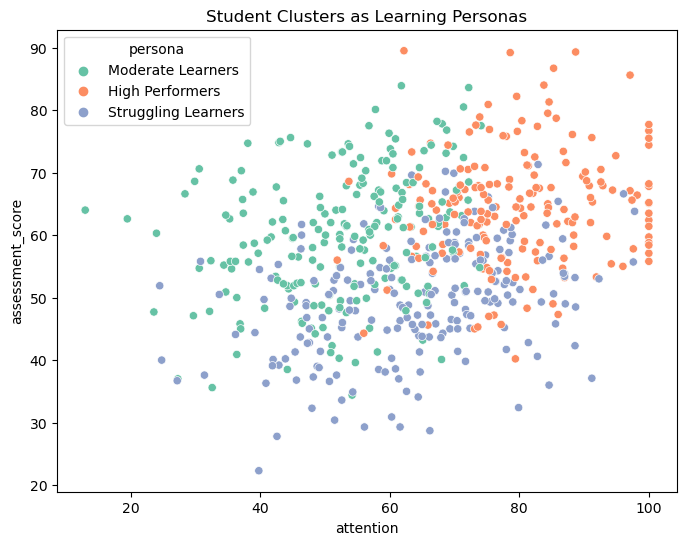


✅ Clustered dataset saved as:
 - students_with_personas.csv
 - students_with_personas.json


In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Dataset loading
df = pd.read_csv("students_synthetic.csv")

print("First 5 rows of dataset:")
print(df.head())

# Correlation Analysis

cognitive_features = ["comprehension", "attention", "focus", "retention", "engagement_time"]
target = "assessment_score"

# Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df[cognitive_features + [target]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Cognitive Skills & Performance")
plt.show()

# Simple ML Model for predicting Assessment Score

X = df[cognitive_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n Assessment Scores / Model Performance:")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

coeffs = pd.DataFrame({"Feature": cognitive_features, "Coefficient": model.coef_})
print("\nFeature Importance:")
print(coeffs)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[cognitive_features])

# Using KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)

# personas
cluster_means = df.groupby("cluster")[target].mean().sort_values()

persona_labels = {}
persona_labels[cluster_means.index[0]] = "Struggling Learners"
persona_labels[cluster_means.index[1]] = "Moderate Learners"
persona_labels[cluster_means.index[2]] = "High Performers"

df["persona"] = df["cluster"].map(persona_labels)

print("\nCluster distribution with personas:")
print(df["persona"].value_counts())

# Visualizing clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="attention", y="assessment_score", hue="persona", palette="Set2")
plt.title("Student Clusters as Learning Personas")
plt.show()

# Exporting data for Dashboard

df.to_csv("students_with_personas.csv", index=False)

df.to_json("students_with_personas.json", orient="records", indent=4)

print("\n✅ Clustered dataset saved as:")
print(" - students_with_personas.csv")
print(" - students_with_personas.json")


In [2]:
import os
print(os.getcwd())


C:\Users\srsar
